# Preprocessing and model training


In this notebook, I will prepare my dataframes and then train several classification models off of them and compare results.

Building off of two previous notebooks: (https://github.com/gisthuband/Capstone_2_DS_Job_Locator/blob/main/data_wrangle.ipynb and https://github.com/gisthuband/Capstone_2_DS_Job_Locator/blob/main/exploratory_data_analysis.ipynb), I have constructed and analyzed a dataframe containing information on data science jobs in 2024.

I will use data to create a classification model, that will take my desired salary range and self perceived competitiveness in the job market, and use that to find the best locations and companies to apply for.

The data was found using a kaggle dataset containing 500 job postings for the data science filed in 2024, and a BLS report generated using data science field statistics of 2023.

Kaggle: https://www.kaggle.com/datasets/ritiksharma07/data-science-job-listings-from-glassdoor   

BLS: https://data.bls.gov/oes/#/occInd/One%20occupation%20for%20multiple%20industries 

The samples' (the individual job postings) features will be their upper salary post, lower salary post, company rating, total data scientists in company's state, ratio of job posts to total data scientists in company state, annual mean wage of state, annual median wage of state, ratio of job post to annual mean wage, and ratio of job post to annual median wage.

Each job will receive its label based on geographic region: west, midwest, south, east, or remote.

The models will train based of off the numerical features as x and the regions as y.


In the end, I will input my own desired salary range and my perceived competitiveness in the job market.  The salary range will correspond to the upper and lower salary features.  The perceived competitiveness will become the ratio of posting to state mean, which that in turn will be used to calculate the ratio of posting to state median.  These ratios will determine the state mean and median features in tandem with the inputted salary range.  The company rating, employment in state, and ratio of posts to employment will be automatically taken as their median values as to not overcomplicate the model.  From this input I will get the region label, and from this region label I can use the original dataframe and generate, the top posting cities in that region, along with the companies and the titles of roles accompanying those posts.



## These classification models will be tested and hyperparameter tuned

1.) Random Forest Classification

2.) K Nearest Neighbors Classification

3.) Gradient Boosting Classification

4.) DNN Classification


In [1]:
from sklearn import preprocessing
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
%matplotlib inline
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
import sklearn
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# 1.) Random Forest Classification

In [2]:
df = pd.read_csv('explored_data_v1.csv')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,upper_salary,lower_salary,state,city,Job Title,Company Rating,company_name,tot_employment_in_state,Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio,labels
0,84000.000000,57000.000000,WI,Onalaska,Associate Stop Loss Underwriter,2.7,The Insurance Center,3090.0,105250.0,101850.0,515.0,0.669834,0.692194,midwest
1,148165.491991,104355.331808,WI,Eau Claire,Marketing Advertising Analyst,3.0,"Net Health Shops, LLC",3090.0,105250.0,101850.0,515.0,1.199624,1.239670,midwest
2,160000.000000,135000.000000,WI,Madison,Manager - IT Infrastructure Engineering,3.9,UW Credit Union,3090.0,105250.0,101850.0,515.0,1.401425,1.448208,midwest
3,84000.000000,59000.000000,WI,Wausau,Associate Stop Loss Underwriter,2.7,The Insurance Center,3090.0,105250.0,101850.0,515.0,0.679335,0.702013,midwest
4,87000.000000,58000.000000,WI,New Berlin,Supply Chain Data Analyst (Day Shift) - New Be...,3.5,DB SCHENKER,3090.0,105250.0,101850.0,515.0,0.688836,0.711831,midwest


In [5]:
df = df.drop(columns=['state','city','Job Title','company_name'])

In [6]:
dum_df = pd.get_dummies(df['labels'])

In [7]:
ready_df = df

In [8]:
dummed_df = pd.concat([df, dum_df],axis=1)

In [9]:
dummed_df = dummed_df.drop(columns='labels')

In [10]:
dummed_df.head()

,upper_salary,lower_salary,Company Rating,tot_employment_in_state,Annual mean wage(2),Annual median wage(2),total_new_post_rat,range_avg_to_mean_ratio,range_avg_to_median_ratio,east,midwest,remote,south,west
0,84000.000000,57000.000000,2.7,3090.0,105250.0,101850.0,515.0,0.669834,0.692194,False,True,False,False,False
1,148165.491991,104355.331808,3.0,3090.0,105250.0,101850.0,515.0,1.199624,1.239670,False,True,False,False,False
2,160000.000000,135000.000000,3.9,3090.0,105250.0,101850.0,515.0,1.401425,1.448208,False,True,False,False,False
3,84000.000000,59000.000000,2.7,3090.0,105250.0,101850.0,515.0,0.679335,0.702013,False,True,False,False,False
4,87000.000000,58000.000000,3.5,3090.0,105250.0,101850.0,515.0,0.688836,0.711831,False,True,False,False,False


In [11]:
features = list(dummed_df.columns[dummed_df.columns != 'west'])
features.remove('south')
features.remove('east')
features.remove('midwest')
features.remove('remote')

In [12]:
X = dummed_df[features]

y = dummed_df[['west','east','south','midwest','remote']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((275, 9), (69, 9), (275, 5), (69, 5))

In [14]:
grid_params = {'n_estimators':[50, 100, 200, 300, 500], 'criterion':['gini','entropy','log_loss'] }

In [15]:
gscv_rfc = GridSearchCV(RandomForestClassifier(), param_grid=grid_params, cv=5, scoring='accuracy')

In [16]:
rfc = gscv_rfc.fit(X_train, y_train)

In [17]:
print (rfc.best_params_)
print (rfc.best_score_)

{'criterion': 'entropy', 'n_estimators': 50}
0.9527272727272728


In [18]:
best_rfc = RandomForestClassifier(n_estimators=50, criterion='entropy')
res = best_rfc.fit(X_train, y_train)

In [19]:
y_pred = res.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred, average='weighted')
rf_recall = recall_score(y_test, y_pred, average='weighted')
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
rf_results = [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_cm]
print (rf_accuracy)
print(rf_precision)
print (rf_recall)
print (rf_f1)
print (rf_cm)

0.9420289855072463
0.9762845849802373
0.9420289855072463
0.9562586590700354
[[ 9  0  0  1  0]
 [ 0 14  0  0  0]
 [ 2  0 23  1  0]
 [ 0  0  0  9  0]
 [ 0  0  0  0 10]]


# 2.) K Neighbors Classifier

1.) Using the standard scaled x data (x - mean)/std

In [20]:
s_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s_scaled=s_scaler.transform(X_train)
X_test_s_scaled=s_scaler.transform(X_test)

X_train_s_scaled.shape, X_test_s_scaled.shape

((275, 9), (69, 9))

In [21]:
X_train_mm_scaled=preprocessing.minmax_scale(X_train)
X_test_mm_scaled=preprocessing.minmax_scale(X_test)

X_train_mm_scaled.shape, X_test_mm_scaled.shape

((275, 9), (69, 9))

In [22]:
grid_params_k = {'n_neighbors':[3, 4, 5, 6, 7, 8 ,9, 10],'leaf_size': [20,40,1], 'weights':['uniform','distance'], 'p':[1,2] }

In [25]:
gscv_knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid_params_k, cv=5, scoring='accuracy')

In [24]:
knn_s = gscv_knn.fit(X_train_s_scaled, y_train)

In [26]:
print (knn_s.best_params_)
print (knn_s.best_score_)

{'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.730909090909091


In [27]:
knn_s_best = KNeighborsClassifier(n_neighbors=3, leaf_size=20, p=1, weights='distance')
model = knn_s_best.fit(X_train_s_scaled, y_train)
y_pred = model.predict(X_test_s_scaled)

In [28]:
knn_ss_accuracy = accuracy_score(y_test, y_pred)
knn_ss_precision = precision_score(y_test, y_pred, average='weighted')
knn_ss_recall = recall_score(y_test, y_pred, average='weighted')
knn_ss_f1 = f1_score(y_test, y_pred, average='weighted')
knn_ss_cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
knn_ss_results=[knn_ss_accuracy, knn_ss_precision, knn_ss_recall, knn_ss_f1, knn_ss_cm]
print (knn_ss_accuracy)
print(knn_ss_precision)
print (knn_ss_recall)
print (knn_ss_f1)
print (knn_ss_cm)

0.8260869565217391
0.9129049904097164
0.8260869565217391
0.8606429934572724
[[ 9  0  0  1  0]
 [ 0 13  1  0  0]
 [ 2  0 22  1  1]
 [ 2  0  0  5  2]
 [ 0  0  0  0 10]]


2.) Using the min max scaling now (X- Xmin)/range

In [29]:
grid_params_k = {'n_neighbors':[3, 4, 5, 6, 7, 8 ,9, 10],'leaf_size': [20,40,1], 'weights':['uniform','distance'], 'p':[1,2] }

In [30]:
gscv_knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid_params_k, cv=5, scoring='accuracy')

In [31]:
knn_mm = gscv_knn.fit(X_train_mm_scaled, y_train)

In [32]:
print (knn_mm.best_params_)
print (knn_mm.best_score_)

{'leaf_size': 20, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.7818181818181819


In [33]:
knn_mm_best = KNeighborsClassifier(n_neighbors=3, leaf_size=20, p=1, weights='distance')
model = knn_mm_best.fit(X_train_mm_scaled, y_train)
y_pred = model.predict(X_test_mm_scaled)


In [34]:
knn_mm_accuracy = accuracy_score(y_test, y_pred)
knn_mm_precision = precision_score(y_test, y_pred, average='weighted')
knn_mm_recall = recall_score(y_test, y_pred, average='weighted')
knn_mm_f1 = f1_score(y_test, y_pred, average='weighted')
knn_mm_cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
knn_mm_results=[knn_mm_accuracy, knn_mm_precision, knn_mm_recall, knn_mm_f1, knn_mm_cm]
print (knn_mm_accuracy)
print(knn_mm_precision)
print (knn_mm_recall)
print (knn_mm_f1)
print (knn_mm_cm)

0.7681159420289855
0.8644157774592558
0.7681159420289855
0.805466998366736
[[ 9  0  0  1  0]
 [ 0 12  2  0  0]
 [ 3  2 19  1  1]
 [ 2  0  0  5  2]
 [ 0  0  0  0 10]]


# 3.) Gradient Boosting Classifier

In [35]:
features = list(ready_df.columns[ready_df.columns != 'labels'])

X = ready_df[features]
y = ready_df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((275, 9), (275,), (69, 9), (69,))

In [36]:
grid_params_gb = {'learning_rate':[0.05, 0.1, 0.25, 0.5, 0.75, 1],'n_estimators':[30, 40, 50, 75, 100],'max_depth':[2, 3, 4, 5, 6], 'max_features':[2, 3, 4, 5, 6]}

In [37]:
gcsv_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=grid_params_gb, cv=5, scoring='accuracy')

In [38]:
gb = gcsv_gb.fit(X_train, y_train)

In [39]:
print (gb.best_params_)
print (gb.best_score_)

{'learning_rate': 0.05, 'max_depth': 4, 'max_features': 6, 'n_estimators': 100}
0.9818181818181818


In [40]:
gb_best = GradientBoostingClassifier(learning_rate=.05, max_depth=4, max_features=6, n_estimators=100)
model = gb_best.fit(X_train, y_train)
y_pred = model.predict(X_test)



In [41]:
gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred, average='weighted')
gb_recall = recall_score(y_test, y_pred, average='weighted')
gb_f1 = f1_score(y_test, y_pred, average='weighted')
gb_cm = confusion_matrix(y_test, y_pred)
gb_results=[gb_accuracy, gb_precision, gb_recall, gb_f1, gb_cm]
print (gb_accuracy)
print(gb_precision)
print (gb_recall)
print (gb_f1)
print (gb_cm)

0.9710144927536232
0.9723320158102767
0.9710144927536232
0.9712174724962447
[[14  0  0  0  0]
 [ 0  8  0  0  1]
 [ 0  0 10  0  0]
 [ 0  1  0 25  0]
 [ 0  0  0  0 10]]


## 4.) Deep Neural Network Classification

In [42]:
import tensorflow as tf
import tensorflow.keras as keras

In [43]:
X = dummed_df[features]
y = dummed_df[['west','east','south','midwest','remote']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)
X_train = tf.convert_to_tensor(X_train)
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(X_train)


In [44]:
def get_basic_model():
    
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(5)
      ])

    model.compile(optimizer='adam',
                    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy', 'precision', 'recall'])
    return model

In [45]:
model = get_basic_model()
hist=model.fit(X_train, y_train, epochs=150, validation_split=.2, batch_size=16, verbose=False)

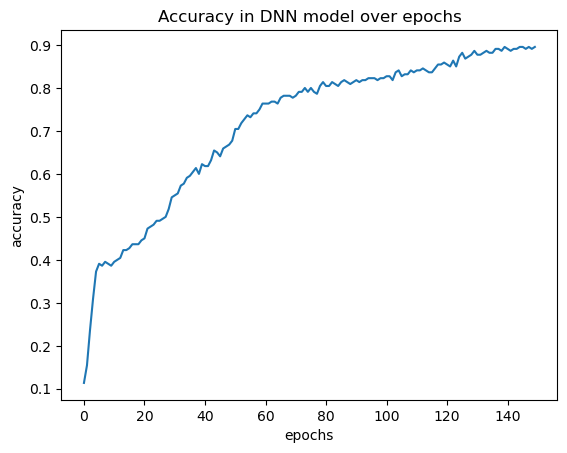

In [73]:
plt.plot(hist.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy in DNN model over epochs')
plt.show()

In [46]:
def dnn_optimize(X_train, y_train, epochs, validation_split, batch_size):
    for x in epochs:
        for y in validation_split:
            for z in batch_size:
                model = get_basic_model()
                hist=model.fit(X_train, y_train, epochs=x, validation_split=y, batch_size=z, verbose=False)
                
            
            plt.plot(hist.history['accuracy'], label='accuracy')
            plt.plot(hist.history['precision'], label='precision')
            plt.plot(hist.history['recall'], label='recall')
            plt.legend()
            plt.xlabel('epochs')
            plt.ylabel('statistic')
            plt.title(f'{x} epochs, {y} valdiation split, and {z} batch size for DNN model')
            plt.show()
    

In [47]:
epochs=[20,50,100,150,200]
validation_split=[.2]
batch_size=[8, 16]

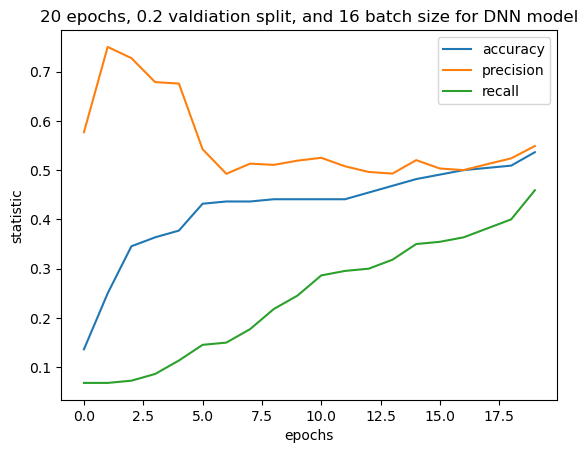

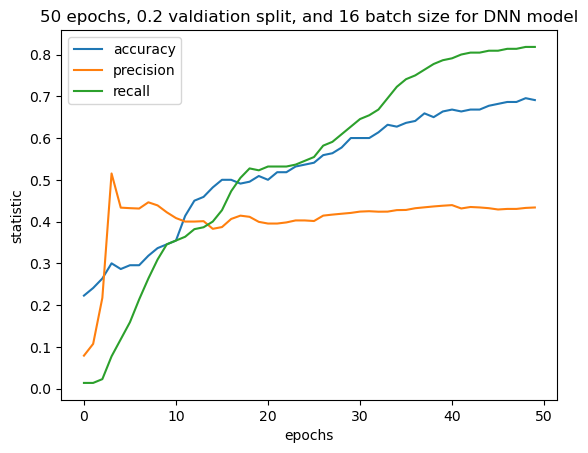

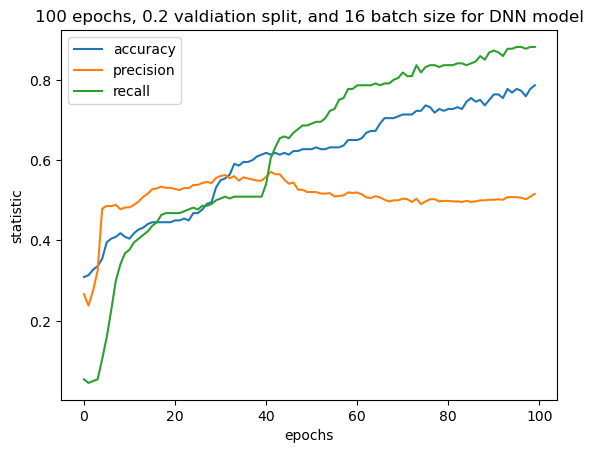

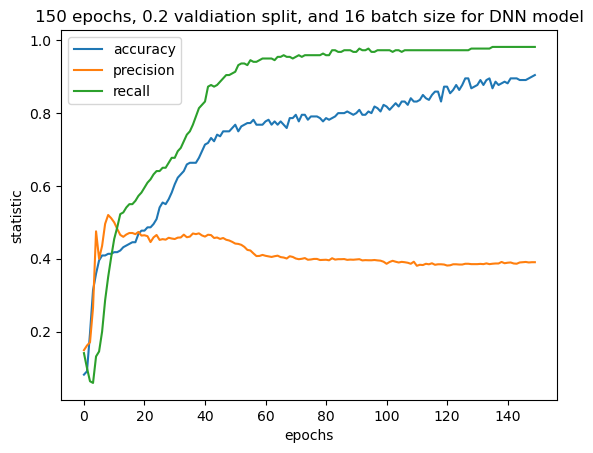

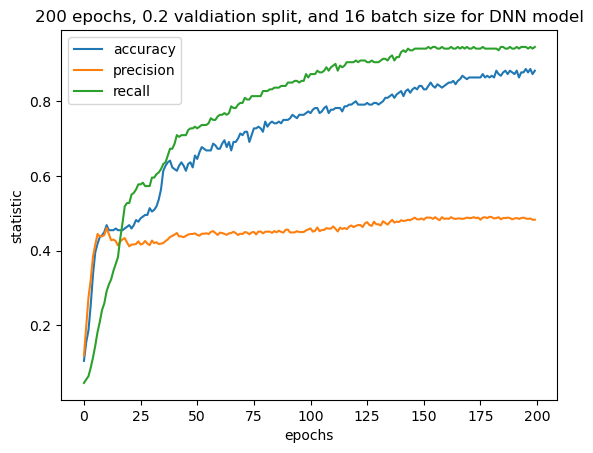

In [48]:
trial = dnn_optimize(X_train, y_train, epochs, validation_split, batch_size)

Considering the 3 statistics found from a confusion matrix, the best performing tuning was 150 epochs, .2 validation split, and 16 batch size 

In [49]:
model = get_basic_model()
hist=model.fit(X_train, y_train, epochs=150, validation_split=.2, batch_size=16, verbose=True)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1386 - loss: 1.7543 - precision: 0.1581 - recall: 0.1241 - val_accuracy: 0.2182 - val_loss: 1.7331 - val_precision: 0.2593 - val_recall: 0.1273
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2462 - loss: 1.6871 - precision: 0.2050 - recall: 0.1267 - val_accuracy: 0.3455 - val_loss: 1.6871 - val_precision: 0.3043 - val_recall: 0.1273
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3203 - loss: 1.5611 - precision: 0.2474 - recall: 0.1338 - val_accuracy: 0.4000 - val_loss: 1.6674 - val_precision: 0.3684 - val_recall: 0.1273
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3692 - loss: 1.5628 - precision: 0.2926 - recall: 0.1361 - val_accuracy: 0.4182 - val_loss: 1.6431 - val_precision: 0.3889 - val_recall: 0.1273
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3574 - loss: 1.5362 - precision: 0.3141 - recall: 0.1242 - val_accuracy: 0.4364 - val_loss: 1.6254 

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4879 - loss: 1.1496 - precision: 0.4536 - recall: 0.5460 - val_accuracy: 0.5636 - val_loss: 1.3220 - val_precision: 0.4507 - val_recall: 0.5818
Epoch 35/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4575 - loss: 1.1627 - precision: 0.4576 - recall: 0.5626 - val_accuracy: 0.5636 - val_loss: 1.2963 - val_precision: 0.4583 - val_recall: 0.6000
Epoch 36/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4810 - loss: 1.1167 - precision: 0.4566 - recall: 0.5867 - val_accuracy: 0.5636 - val_loss: 1.2712 - val_precision: 0.4521 - val_recall: 0.6000
Epoch 37/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4735 - loss: 1.1105 - precision: 0.4437 - recall: 0.5936 - val_accuracy: 0.5636 - val_loss: 1.2582 - val_precision: 0.4342 - val_recall: 0.6000
Epoch 38/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5405 - loss: 1.0808 - precision: 0.4788 - recall: 0.6435 - val_accuracy: 0.5636 - val_loss: 1.2346 - val_pr

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7321 - loss: 0.6998 - precision: 0.4622 - recall: 0.8716 - val_accuracy: 0.6364 - val_loss: 0.8670 - val_precision: 0.4536 - val_recall: 0.8000
Epoch 68/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7223 - loss: 0.6824 - precision: 0.4563 - recall: 0.8689 - val_accuracy: 0.6364 - val_loss: 0.8643 - val_precision: 0.4526 - val_recall: 0.7818
Epoch 69/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7118 - loss: 0.6599 - precision: 0.4647 - recall: 0.8708 - val_accuracy: 0.6364 - val_loss: 0.8518 - val_precision: 0.4639 - val_recall: 0.8182
Epoch 70/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7719 - loss: 0.6087 - precision: 0.4714 - recall: 0.9142 - val_accuracy: 0.6545 - val_loss: 0.8514 - val_precision: 0.4545 - val_recall: 0.8182
Epoch 71/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.6649 - precision: 0.4447 - recall: 0.8761 - val_accuracy: 0.6545 - val_loss: 0.8458 - val_pr

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7928 - loss: 0.4948 - precision: 0.4953 - recall: 0.9093 - val_accuracy: 0.7455 - val_loss: 0.7070 - val_precision: 0.4796 - val_recall: 0.8545
Epoch 101/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8198 - loss: 0.4805 - precision: 0.5000 - recall: 0.8898 - val_accuracy: 0.7636 - val_loss: 0.7016 - val_precision: 0.4747 - val_recall: 0.8545
Epoch 102/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8349 - loss: 0.4696 - precision: 0.5120 - recall: 0.9165 - val_accuracy: 0.7273 - val_loss: 0.7025 - val_precision: 0.4694 - val_recall: 0.8364
Epoch 103/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8261 - loss: 0.4586 - precision: 0.4874 - recall: 0.9066 - val_accuracy: 0.7455 - val_loss: 0.6966 - val_precision: 0.4752 - val_recall: 0.8727
Epoch 104/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8272 - loss: 0.4535 - precision: 0.5016 - recall: 0.9330 - val_accuracy: 0.7636 - val_loss: 0.6896 - va

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.3688 - precision: 0.4704 - recall: 0.9311 - val_accuracy: 0.7818 - val_loss: 0.6209 - val_precision: 0.4706 - val_recall: 0.8727
Epoch 134/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9190 - loss: 0.3339 - precision: 0.4881 - recall: 0.9409 - val_accuracy: 0.7636 - val_loss: 0.6097 - val_precision: 0.4700 - val_recall: 0.8545
Epoch 135/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9042 - loss: 0.3694 - precision: 0.4731 - recall: 0.9083 - val_accuracy: 0.7818 - val_loss: 0.6212 - val_precision: 0.4706 - val_recall: 0.8727
Epoch 136/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9157 - loss: 0.3276 - precision: 0.4936 - recall: 0.9409 - val_accuracy: 0.8000 - val_loss: 0.6147 - val_precision: 0.4639 - val_recall: 0.8182
Epoch 137/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8931 - loss: 0.3412 - precision: 0.4767 - recall: 0.9195 - val_accuracy: 0.7818 - val_loss: 0.6019 - va

In [50]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [51]:
dnn_accuracy = accuracy_score(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
dnn_precision = precision_score(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1), average='weighted')
dnn_recall = recall_score(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1), average='weighted')
dnn_f1 = f1_score(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1), average='weighted')
dnn_cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1))
dnn_results=[dnn_accuracy, dnn_precision, dnn_recall, dnn_f1, dnn_cm]
print (dnn_accuracy)
print(dnn_precision)
print (dnn_recall)
print (dnn_f1)
print (dnn_cm)

0.7681159420289855
0.8195131192573648
0.7681159420289855
0.7754701964439202
[[ 9  0  0  1  0]
 [ 0 12  1  1  0]
 [ 0  3 16  5  2]
 [ 0  0  1  8  0]
 [ 0  0  0  2  8]]


# In summary:

The performance of the classifiers can be seen in the dataframe below (results_df).


The best performing model is the gradient booster classifier, this is most likely due to the error training component.  Gradient Boosting classifiers are robust to outliers, which may have helped pushed its ability to perform higher.  The individual data labels may have seemingly outlier like vales within the label, leading to GB's success for training so well on the error.  

The random forest performed very well most likely because it was able to generate enough decision trees that were very overfit to the data, and then average those with the very unfit ones successfully.


K Nearest with standard scaling seemed to be middle of the road, implying that the dataframe ranges were not apt for maxmin scaling, and also that the data clustered fine, but not exceptionally in the cluster's view of the features.  This may indicate that the data contains outliers that are causing misreads within the assigned labels.


Deep neural network performed worst in this instance, perhaps it was due to lack of innovation in the layering or the data did not flow into the neurons well.

Overall gradient boosting performed the best, and this and the random forest and deep neural network will be implemented on the final step: the final model construction and execution.  The deep neural network is being tested out to see if the worst performing model is able to keep up with the best performing model's prediction.



In [52]:
results_df = pd.DataFrame(data={'Random_Forest':rf_results, 'K_Nearest_Standard_Scaled':knn_ss_results, 'K_Nearest_MaxMin_Scaled':knn_mm_results, 'Gradient_Booster':gb_results, 'Deep Neural Network': dnn_results})

In [53]:
results_df = results_df.rename(index={0:'accuracy',1:'precision',2:'recall',3:'f1'})

In [54]:
results_df = results_df.drop(index=4)

In [55]:
results_df.head()

,Random_Forest,K_Nearest_Standard_Scaled,K_Nearest_MaxMin_Scaled,Gradient_Booster,Deep Neural Network
accuracy,0.942029,0.826087,0.768116,0.971014,0.768116
precision,0.976285,0.912905,0.864416,0.972332,0.819513
recall,0.942029,0.826087,0.768116,0.971014,0.768116
f1,0.956259,0.860643,0.805467,0.971217,0.77547


In [56]:
results_df.to_csv('model_comp.csv')